# Data Preparation

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
pd.set_option('display.width', 1000)
#pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings("ignore")

In [127]:
data = pd.read_csv('processed_data.csv')

In [128]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le=LabelEncoder()
data['V4'] = le.fit_transform(data['V4'])

In [129]:
customer_type = pd.get_dummies(data['V2'])
customer_pay = pd.get_dummies(data['V18'])
customer_tier = pd.get_dummies(data['V19'])
customer_indus= pd.get_dummies(data['V20'])
data = pd.concat([data,customer_pay,customer_type,customer_tier,customer_indus], axis=1)
data.drop(['V2','V3','V18','V19','V20', 'Manual', 'New Customer','Not assigned','Not classified'], axis=1, inplace=True)

In [130]:
#data = pd.get_dummies(data)
columns = [column for column in data.columns if column!='V17']
columns = columns+['V17']
data=data[columns]

In [131]:
data.head()

,V4,V6,V7,V8,V14,V15,V16,Auto,Existing Customer,Gov/R&E,...,Media & Entertainment,Non Profits,Other,Professional Services,Public Sector,Retail,Telecommunications,Transportation & Logistics,Unclassified,V17
0,218536,36.0,109999998.9,0.0,730.0,33.827778,-118.231824,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,211887,36.0,109999998.9,0.0,0.0,40.593367,-85.984135,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,320610,24.0,107999998.9,0.0,128.0,42.643889,-71.189469,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,493652,36.0,40180000.0,0.0,660.0,40.776557,-112.013581,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,493652,36.0,40180000.0,0.0,656.0,39.745350,-104.979818,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
V4                                1000000 non-null int64
V6                                1000000 non-null float64
V7                                1000000 non-null float64
V8                                1000000 non-null float64
V14                               1000000 non-null float64
V15                               1000000 non-null float64
V16                               1000000 non-null float64
Auto                              1000000 non-null uint8
Existing Customer                 1000000 non-null uint8
Gov/R&E                           1000000 non-null uint8
SEAT                              1000000 non-null uint8
Sub-Tier 3                        1000000 non-null uint8
Telecom                           1000000 non-null uint8
Tier 1                            1000000 non-null uint8
Tier 2                            1000000 non-null uint8
Tier 3               

In [133]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

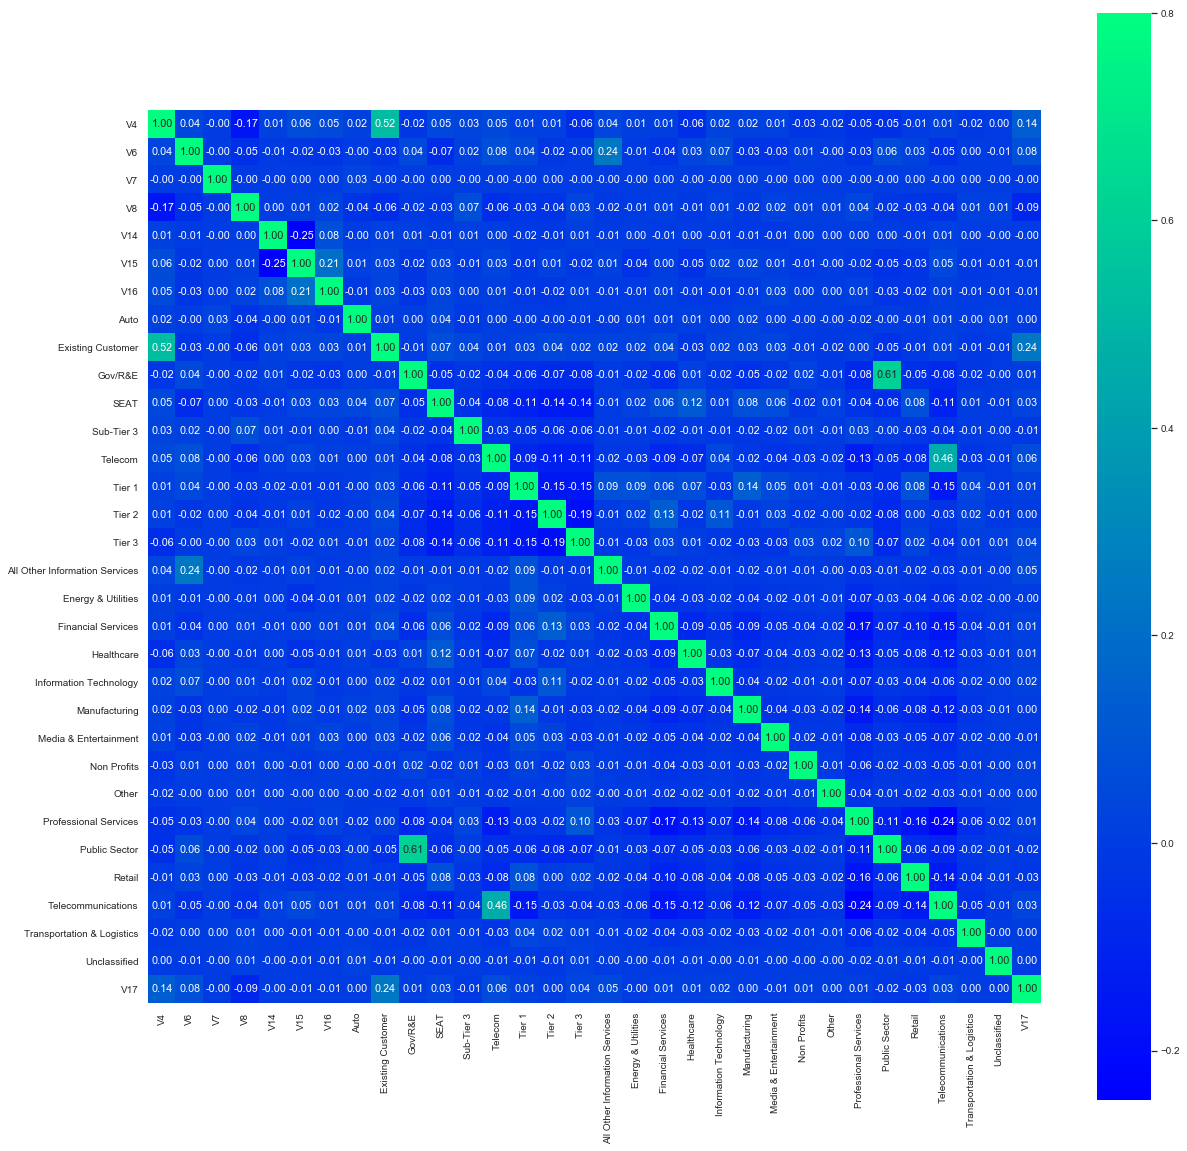

In [134]:
corrmat=data.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale=0.9)
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f',cmap="winter")

In [135]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800000, 31) (800000,)
(200000, 31) (200000,)


In [136]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [137]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score, f1_score, classification_report, roc_curve, auc,roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [138]:
data.head()

,V4,V6,V7,V8,V14,V15,V16,Auto,Existing Customer,Gov/R&E,...,Media & Entertainment,Non Profits,Other,Professional Services,Public Sector,Retail,Telecommunications,Transportation & Logistics,Unclassified,V17
0,218536,36.0,109999998.9,0.0,730.0,33.827778,-118.231824,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,211887,36.0,109999998.9,0.0,0.0,40.593367,-85.984135,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,320610,24.0,107999998.9,0.0,128.0,42.643889,-71.189469,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,493652,36.0,40180000.0,0.0,660.0,40.776557,-112.013581,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,493652,36.0,40180000.0,0.0,656.0,39.745350,-104.979818,0,1,0,...,0,0,0,0,0,0,0,0,0,0


array([[-1.21079100e+00,  1.85338846e-01, -7.71813430e-03, ...,
        -4.53719841e-01, -1.15273612e-01, -2.91456856e-02],
       [-9.09398490e-01,  1.85338846e-01,  4.25430920e-04, ...,
        -4.53719841e-01, -1.15273612e-01, -2.91456856e-02],
       [-1.30140808e+00,  1.85338846e-01, -7.75891261e-03, ...,
        -4.53719841e-01, -1.15273612e-01, -2.91456856e-02],
       ...,
       [ 1.45019843e+00,  1.85338846e-01, -6.37383264e-03, ...,
        -4.53719841e-01, -1.15273612e-01, -2.91456856e-02],
       [-2.25837187e-01, -5.41289893e-01, -5.41908472e-03, ...,
         2.20400324e+00, -1.15273612e-01, -2.91456856e-02],
       [-1.31609068e+00,  1.85338846e-01, -8.28311250e-03, ...,
        -4.53719841e-01, -1.15273612e-01, -2.91456856e-02]])

# Logistic Regression Model

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
model_lr = LogisticRegression(random_state=0)

In [144]:
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [145]:
print('Score: {0:.2f}'.format(model_lr.score(X_test, y_test)))
print('Accuracy: {0:.2f}'.format(accuracy_score(y_test, model_lr.predict(X_test))))
print('Confusion matrix: \n {0}'.format(confusion_matrix(y_test, model_lr.predict(X_test))))
print('Precision: {0:.2f}'.format(precision_score(y_test, model_lr.predict(X_test))))
print('Recall: {0:.2f}'.format(recall_score(y_test, model_lr.predict(X_test))))
print('F-1 score: {0:.2f}'.format(f1_score(y_test, model_lr.predict(X_test))))
print(classification_report(y_test, model_lr.predict(X_test)))


Score: 0.83
Accuracy: 0.83
Confusion matrix: 
 [[166402    140]
 [ 32969    489]]
Precision: 0.78
Recall: 0.01
F-1 score: 0.03
              precision    recall  f1-score   support

           0       0.83      1.00      0.91    166542
           1       0.78      0.01      0.03     33458

   micro avg       0.83      0.83      0.83    200000
   macro avg       0.81      0.51      0.47    200000
weighted avg       0.83      0.83      0.76    200000



# ROC curve

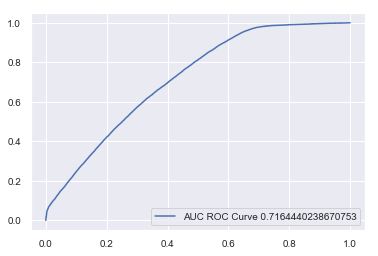

In [146]:
y_prob = model_lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr,tpr,label="AUC ROC Curve "+str(auc))
plt.legend(loc=4)
plt.show()

# Handling imbalanced data

In [147]:
unique, count = np.unique(y_train, return_counts=True)
y = {k:v for (k,v) in zip(unique,count)}
y

{0: 665324, 1: 134676}

In [221]:
sm = SMOTE(random_state=0, ratio = 0.75)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [222]:
unique, count = np.unique(y_train_sm, return_counts=True)
y_smote = {k:v for (k,v) in zip(unique,count)}
y_smote

{0: 665324, 1: 498993}

In [223]:
model_lr_1 = LogisticRegression(C=1000, penalty='l1',random_state=0)
model_lr_1 = model_lr_1.fit(X_train_sm, y_train_sm)

In [224]:
print('Score: {0:.2f}'.format(model_lr_1.score(X_test, y_test)))
print('Accuracy: {0:.2f}'.format(accuracy_score(y_test, model_lr_1.predict(X_test))))
print('Confusion matrix: \n {0}'.format(confusion_matrix(y_test, model_lr_1.predict(X_test))))
print('Precision: {0:.2f}'.format(precision_score(y_test, model_lr_1.predict(X_test))))
print('Recall: {0:.2f}'.format(recall_score(y_test, model_lr_1.predict(X_test))))
print('F-1 score: {0:.2f}'.format(f1_score(y_test, model_lr_1.predict(X_test))))
print(classification_report(y_test, model_lr_1.predict(X_test)))

Score: 0.65
Accuracy: 0.65
Confusion matrix: 
 [[109892  56650]
 [ 12374  21084]]
Precision: 0.27
Recall: 0.63
F-1 score: 0.38
              precision    recall  f1-score   support

           0       0.90      0.66      0.76    166542
           1       0.27      0.63      0.38     33458

   micro avg       0.65      0.65      0.65    200000
   macro avg       0.59      0.65      0.57    200000
weighted avg       0.79      0.65      0.70    200000



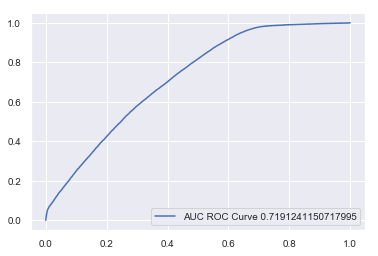

In [225]:
y_prob = model_lr_1.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr,tpr,label="AUC ROC Curve "+str(auc))
plt.legend(loc=4)
plt.show()

# Hyperparameter optimization

In [205]:
from sklearn.model_selection import GridSearchCV
model_lr_1 = LogisticRegression(random_state=0)

In [206]:
parameters = {'C':[1.0,10.0,50.0,100.0, 1000.0], 'penalty': ['l1','l2']}
clf = GridSearchCV(model_lr_1, param_grid=parameters, cv=3)

In [207]:
clf.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1.0, 10.0, 50.0, 100.0, 1000.0], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [208]:
clf.best_params_

{'C': 1000.0, 'penalty': 'l1'}

In [209]:
print('best score: {0:.2f}'.format(clf.best_score_))

best score: 0.66


In [210]:
print('score for Logistic Regression model : {0:.2f}'.format(clf.score(X_test, y_test)))

score for Logistic Regression model : 0.54


In [212]:
print('f1-score for Logistic Regression model : {0:.2f}'.format(f1_score(y_test, clf.predict(X_test))))

f1-score for Logistic Regression model : 0.38


# Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
model_rfc = RandomForestClassifier()

In [226]:
model_rfc.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [227]:
print('Score: {0:.2f}'.format(model_rfc.score(X_test, y_test)))
print('Accuracy: {0:.2f}'.format(accuracy_score(y_test, model_rfc.predict(X_test))))
print('Confusion matrix: \n {0}'.format(confusion_matrix(y_test, model_rfc.predict(X_test))))
print('Precision: {0:.2f}'.format(precision_score(y_test, model_rfc.predict(X_test))))
print('Recall: {0:.2f}'.format(recall_score(y_test, model_rfc.predict(X_test))))
print('F-1 score: {0:.2f}'.format(f1_score(y_test, model_rfc.predict(X_test))))
print(classification_report(y_test, model_rfc.predict(X_test)))

Score: 0.92
Accuracy: 0.92
Confusion matrix: 
 [[159195   7347]
 [  9345  24113]]
Precision: 0.77
Recall: 0.72
F-1 score: 0.74
              precision    recall  f1-score   support

           0       0.94      0.96      0.95    166542
           1       0.77      0.72      0.74     33458

   micro avg       0.92      0.92      0.92    200000
   macro avg       0.86      0.84      0.85    200000
weighted avg       0.91      0.92      0.92    200000



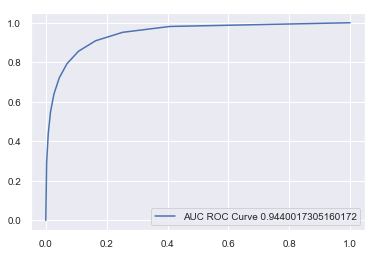

In [228]:
y_prob = model_rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr,tpr,label="AUC ROC Curve "+str(auc))
plt.legend(loc=4)
plt.show()